In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data

df = pd.read_csv('/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv')

df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
print(df.shape)
print(df.info())
print(df.duplicated().sum())
print(df.isnull().sum())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

**EDA**

In [5]:
#check the number of unique values in each cols

df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [6]:
#check basic statistics

df.describe() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


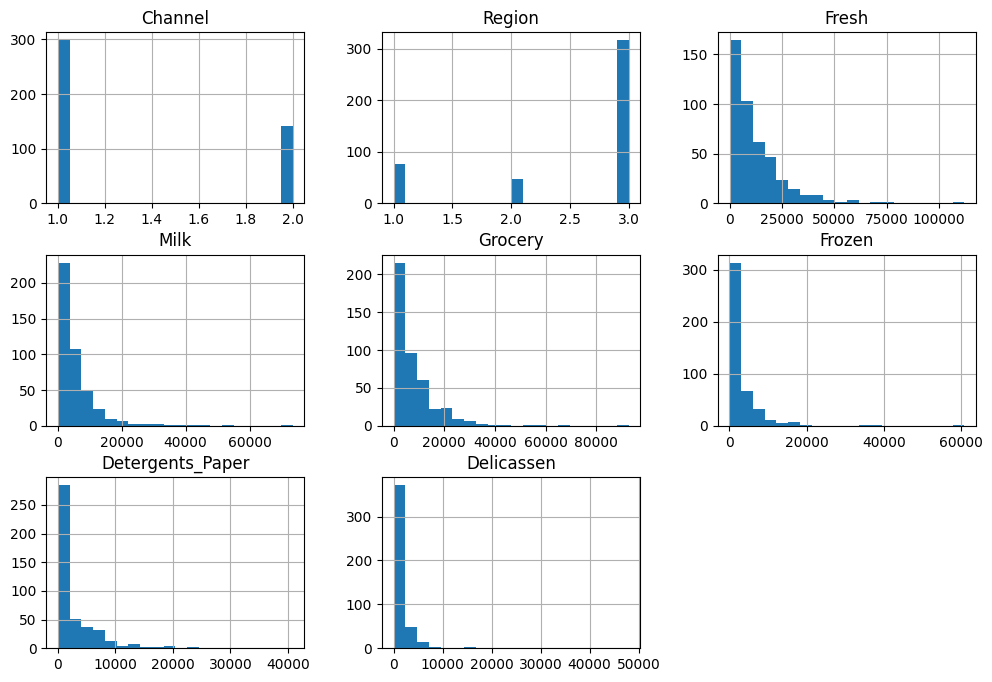

In [7]:
#distrbution of numerical cols


df.hist(bins=20, figsize=(12, 8)) #use countplot for categorical variables
plt.show()


                  Q1 (25%)  Median (Q2)  Q3 (75%)       IQR  Lower Bound  \
Fresh              3127.75       8504.0  16933.75  13806.00   -17581.250   
Milk               1533.00       3627.0   7190.25   5657.25    -6952.875   
Grocery            2153.00       4755.5  10655.75   8502.75   -10601.125   
Frozen              742.25       1526.0   3554.25   2812.00    -3475.750   
Detergents_Paper    256.75        816.5   3922.00   3665.25    -5241.125   
Delicassen          408.25        965.5   1820.25   1412.00    -1709.750   

                  Upper Bound  
Fresh               37642.750  
Milk                15676.125  
Grocery             23409.875  
Frozen               7772.250  
Detergents_Paper     9419.875  
Delicassen           3938.250  


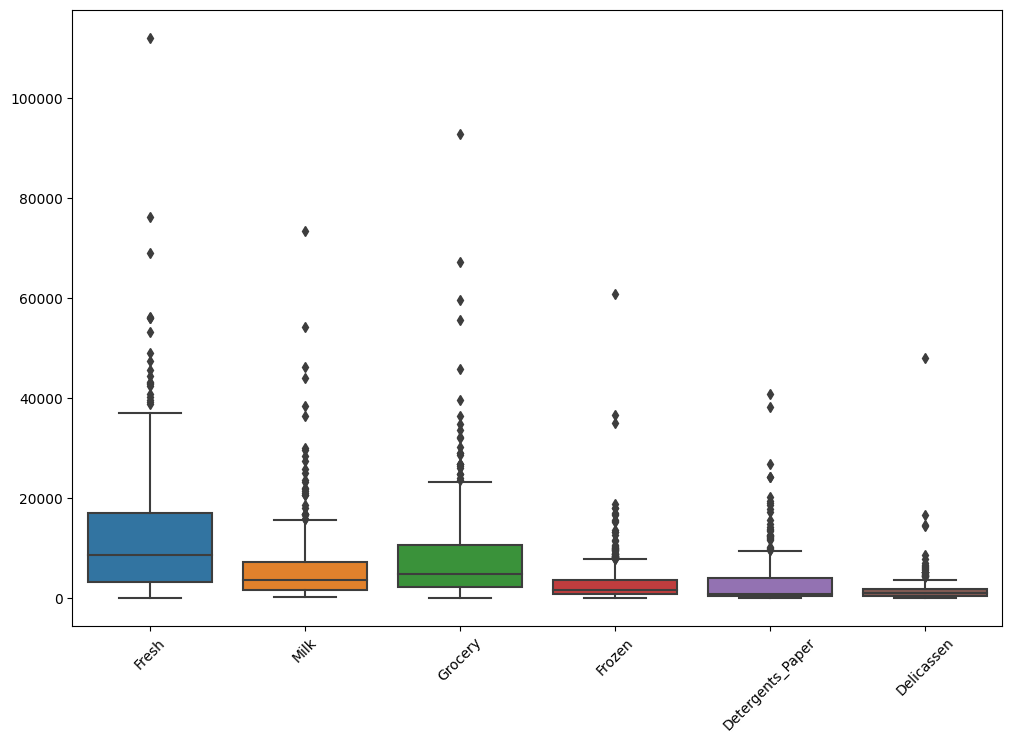

In [8]:
#use boxplot to check for outliers in spending cols

# Select only numerical spending columns
num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Calculate Q1, Median, Q3, IQR
q1 = df[num_cols].quantile(0.25)
median = df[num_cols].quantile(0.50)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

# Calculate outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Combine into one DataFrame for readability
box_stats = pd.DataFrame({
    'Q1 (25%)': q1,
    'Median (Q2)': median,
    'Q3 (75%)': q3,
    'IQR': iqr,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})

print(box_stats)


plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop(['Channel', 'Region'], axis=1))
plt.xticks(rotation=45)
plt.show()

In [9]:
# Count outliers for each column
outlier_counts = {}

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Count rows outside bounds
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Display results
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)


                  Outlier Count
Fresh                        20
Milk                         28
Grocery                      24
Frozen                       43
Detergents_Paper             30
Delicassen                   27


In [10]:
#check for corrlation

df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


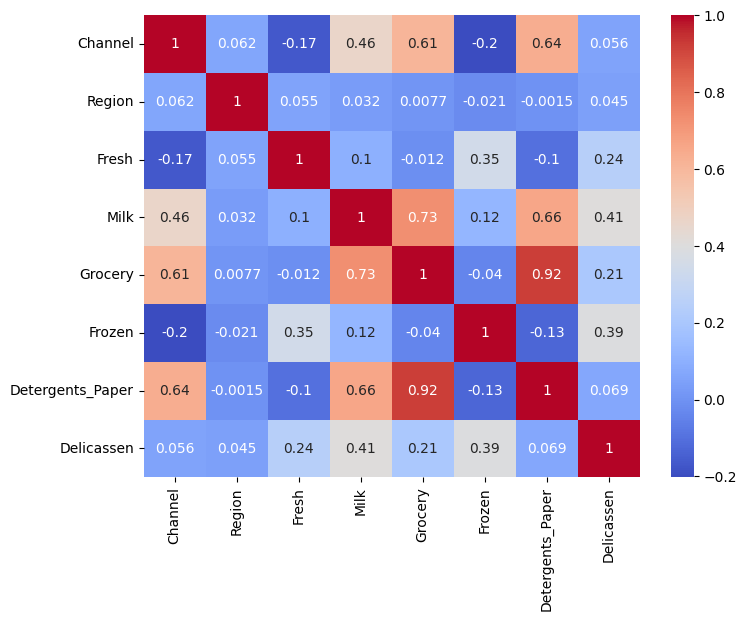

In [11]:
#correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


**PREPROCESSING FOR CLUSTERING**

In [12]:
#Drop the categorical columns (Channel, Region) to cluster only on spending amounts:

#select features for clustering

from sklearn.preprocessing import StandardScaler

X = df.drop(['Channel', 'Region'], axis=1)

#scale features using standard scaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#Dimensionality Reduction (Optional but Helpful)
#You can use PCA to reduce dimensions for visualization
#and sometimes improve clustering performance.

from sklearn.decomposition import PCA

pca = PCA(n_components=2) #note, i used 3 before

X_pca = pca.fit_transform(X_scaled)


In [14]:
#check which feature contribute most to pca and drop the less performing features

# Create a DataFrame for PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],  # same as n_components
    index=X.columns
)

# Get overall importance by summing absolute contributions
loadings['total_abs'] = loadings.abs().sum(axis=1)

# Sort features by their overall importance
loadings.sort_values('total_abs', ascending=False)


,PC1,PC2,total_abs
Detergents_Paper,0.548640,-0.255233,0.803873
Delicassen,0.248682,0.504207,0.752889
Grocery,0.579256,-0.146088,0.725345
Frozen,0.051189,0.611278,0.662466
Milk,0.545118,0.083168,0.628286
Fresh,0.042884,0.527932,0.570816


In [15]:
#get the best pca components and compare answers

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

best_score = -1
best_params = {}

# Try different PCA component counts
for n_components in range(2, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n_components, random_state=42)
    X_pca_temp = pca.fit_transform(X_scaled)
    
    # Try different k values
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_pca_temp)
        score = silhouette_score(X_pca_temp, labels)
        
        # Track the best
        if score > best_score:
            best_score = score
            best_params = {
                "n_components": n_components,
                "n_clusters": k,
                "silhouette_score": score
            }

print("✅ Best PCA + KMeans Parameters Found:")
print(best_params)


✅ Best PCA + KMeans Parameters Found:
{'n_components': 2, 'n_clusters': 2, 'silhouette_score': 0.6475067411245407}


In [16]:
#clustering and evaluation

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Cluster labels
labels = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
#evaluate

from sklearn.metrics import silhouette_score 

score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.648


In [18]:
#get cluster labels

cluster_labels = kmeans.fit_predict(X_pca)

#attach cluster labels to original data
df_clusters = df.copy()
df_clusters['Cluster'] = cluster_labels


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df_clusters


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


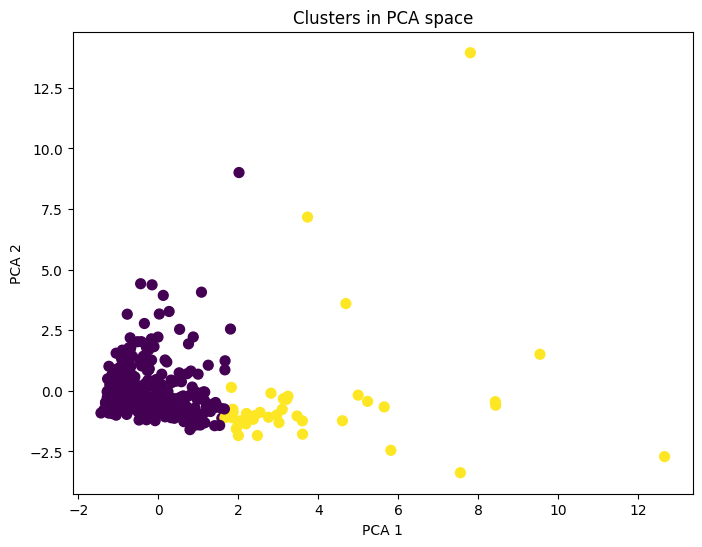

In [20]:
#plot the cluster summary

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters in PCA space')
plt.show()


**Create a Cluster Profile Table**

In [21]:
# Profile each cluster
cluster_profile = df_clusters.groupby('Cluster').mean()

# If you want counts too:
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()

print("Cluster Counts:\n", cluster_counts)
print("\nCluster Profile:\n", cluster_profile)


Cluster Counts:
 Cluster
0    399
1     41
Name: count, dtype: int64

Cluster Profile:
           Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.258145  2.551378  12010.105263   4229.636591   5724.684211   
1        1.951220  2.463415  11904.853659  21042.243902  29619.829268   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        3062.070175       1776.062657  1305.944862  
1        3167.902439      13639.219512  3655.390244  


** Cluster 0 (411 records)

1. Represents the majority of customers (over 90%).

a. Moderate to low spending across all categories.

b. Typical of smaller retailers or individual customers.

2. Cluster 1 (29 records)

a. Smaller group of customers.

b. Extremely high spending in Milk, Grocery, Detergents_Paper.

Likely large supermarkets or wholesale buyers.**

In [22]:
# Define a mapping from cluster to insight

cluster_insights = {
    0: "Retailers",
    1: "Wholesalers"
}

# Add a new column to the dataframe
df_clusters['Insight'] = df_clusters['Cluster'].map(cluster_insights)

# Check the result
print(df_clusters.head(10))


   Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669   9656     7561     214              2674   
1        2       3   7057   9810     9568    1762              3293   
2        2       3   6353   8808     7684    2405              3516   
3        1       3  13265   1196     4221    6404               507   
4        2       3  22615   5410     7198    3915              1777   
5        2       3   9413   8259     5126     666              1795   
6        2       3  12126   3199     6975     480              3140   
7        2       3   7579   4956     9426    1669              3321   
8        1       3   5963   3648     6192     425              1716   
9        2       3   6006  11093    18881    1159              7425   

   Delicassen  Cluster    Insight  
0        1338        0  Retailers  
1        1776        0  Retailers  
2        7844        0  Retailers  
3        1788        0  Retailers  
4        5185        0  Retailers  
5 

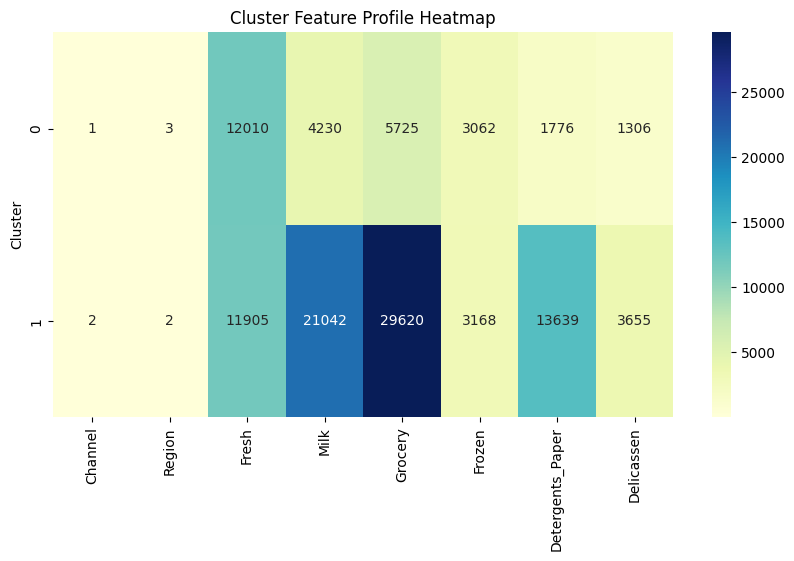

In [23]:
#Optional: Heatmap for quick visual comparison

plt.figure(figsize=(10,5))
sns.heatmap(cluster_profile, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Cluster Feature Profile Heatmap')
plt.show()
